# **ML PROJECT**

✅ Dataset Restructuring Done
✅ Balanced! Fresh: 4740, Rotten: 4740
Found 9480 images belonging to 2 classes.
Found 2698 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
🚀 Phase 1: Training Top Layers (Short Exam)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.8348 - loss: 0.6034

297/297 ━━━━━━━━━━━━━━━━━━━━ 243s 720ms/step - accuracy: 0.8350 - loss: 0.6031 - val_accuracy: 0.9796 - val_loss: 0.3795
Epoch 2/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9393 - loss: 0.4317

297/297 ━━━━━━━━━━━━━━━━━━━━ 178s 597ms/step - accuracy: 0.9394 - loss: 0.4317 - val_accuracy: 0.9815 - val_loss: 0.3655
Epoch 3/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.9544 - loss: 0.4156

297/297 ━━━━━━━━━━━━━━━━━━━━ 179s 602ms/step - accuracy: 0.9545 - loss: 0.4156 - val_accuracy: 0.9841 - val_loss: 0.3606
Epoch 4/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.9613 - loss: 0.4065

297/297 ━━━━━━━━━━━━━━━━━━━━ 182s 611ms/step - accuracy: 0.9613 - loss: 0.4065 - val_accuracy: 0.9848 - val_loss: 0.3570
Epoch 5/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 178s 601ms/step - accuracy: 0.9608 - loss: 0.4043 - val_accuracy: 0.9844 - val_loss: 0.3554
Epoch 6/6
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.9598 - loss: 0.4034

297/297 ━━━━━━━━━━━━━━━━━━━━ 179s 603ms/step - accuracy: 0.9598 - loss: 0.4033 - val_accuracy: 0.9922 - val_loss: 0.3540
🔓 Phase 2: Fine-Tuning (Very Short)...
Epoch 1/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 255s 764ms/step - accuracy: 0.9341 - loss: 0.4281 - val_accuracy: 0.9915 - val_loss: 0.3537
Epoch 2/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 183s 617ms/step - accuracy: 0.9564 - loss: 0.4065 - val_accuracy: 0.9893 - val_loss: 0.3543
Epoch 3/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 181s 611ms/step - accuracy: 0.9637 - loss: 0.4005 - val_accuracy: 0.9904 - val_loss: 0.3535
Epoch 4/4
297/297 ━━━━━━━━━━━━━━━━━━━━ 182s 613ms/step - accuracy: 0.9632 - loss: 0.4004 - val_accuracy: 0.9907 - val_loss: 0.3517


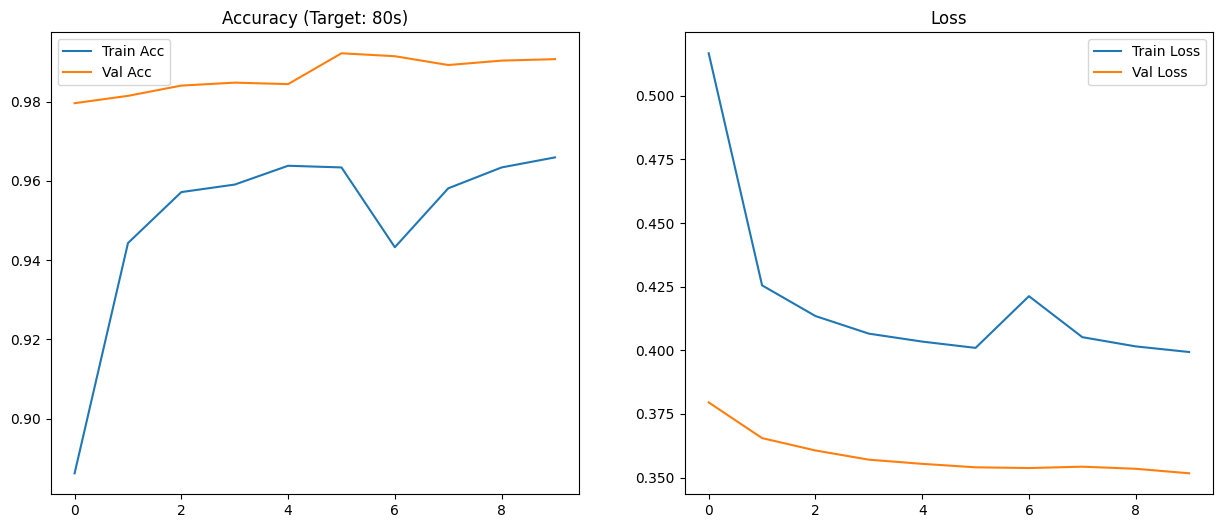

In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing import image

# ---------------------
if os.path.exists("dataset_final"):
    shutil.rmtree("dataset_final")

folders = [
    "dataset_final/train/fresh", "dataset_final/train/rotten",
    "dataset_final/test/fresh", "dataset_final/test/rotten"
]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

train_path = "dataset/dataset/train"
for folder in os.listdir(train_path):
    src_folder = os.path.join(train_path, folder)
    if folder.lower().startswith("fresh"):
        dest = "dataset_final/train/fresh"
    elif folder.lower().startswith("rotten"):
        dest = "dataset_final/train/rotten"
    else:
        continue
    for img in os.listdir(src_folder):
        shutil.copy(os.path.join(src_folder, img), dest)

test_path = "dataset/dataset/test"
for folder in os.listdir(test_path):
    src_folder = os.path.join(test_path, folder)
    if folder.lower().startswith("fresh"):
        dest = "dataset_final/test/fresh"
    elif folder.lower().startswith("rotten"):
        dest = "dataset_final/test/rotten"
    else:
        continue
    for img in os.listdir(src_folder):
        shutil.copy(os.path.join(src_folder, img), dest)

print("Dataset Restructuring Done")

train_dir = "dataset_final/train"
fresh_dir = os.path.join(train_dir, "fresh")
rotten_dir = os.path.join(train_dir, "rotten")

fresh_imgs = os.listdir(fresh_dir)
rotten_imgs = os.listdir(rotten_dir)
min_count = min(len(fresh_imgs), len(rotten_imgs))

if len(rotten_imgs) > min_count:
    for img in random.sample(rotten_imgs, len(rotten_imgs) - min_count):
        os.remove(os.path.join(rotten_dir, img))
if len(fresh_imgs) > min_count:
    for img in random.sample(fresh_imgs, len(fresh_imgs) - min_count):
        os.remove(os.path.join(fresh_dir, img))

print(f"Balanced! Fresh: {len(os.listdir(fresh_dir))}, Rotten: {len(os.listdir(rotten_dir))}")

# Augmentataion
# --------------------------------------
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    channel_shift_range=50.0,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4, 1.6],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    "dataset_final/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    "dataset_final/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# MODEL
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = GaussianNoise(0.3)(x)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.7)(x)
output = Dense(1, activation="sigmoid")(x)
model = Model(inputs=base_model.input, outputs=output)
loss_fn = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.2)
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_fn, metrics=["accuracy"])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint("best_fruit_model.h5", monitor='val_accuracy', save_best_only=True)
]

print("Phase 1: Training Top Layers (Short Exam)...")
history1 = model.fit(train_generator, validation_data=test_generator, epochs=6, callbacks=callbacks)

print("Phase 2: Fine-Tuning (Very Short)...")
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5), loss=loss_fn, metrics=["accuracy"])
history_fine = model.fit(train_generator, validation_data=test_generator, epochs=4, callbacks=callbacks)

def plot_history(h1, h2):
    acc = h1.history['accuracy'] + h2.history['accuracy']
    val_acc = h1.history['val_accuracy'] + h2.history['val_accuracy']
    loss = h1.history['loss'] + h2.history['loss']
    val_loss = h1.history['val_loss'] + h2.history['val_loss']

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.title('Accuracy (Target: 80s)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

plot_history(history1, history_fine)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


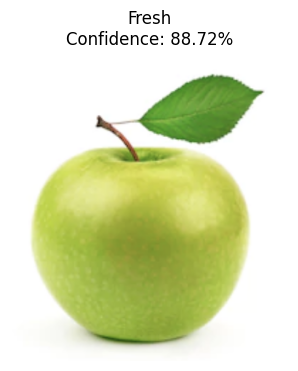

Raw Output: 0.11276565492153168


In [ ]:

# PREDICTION
def predict_image_with_display(image_path):
    if not os.path.exists(image_path):
        print("Image not found, picking random...")
        base = "dataset_final/test/rotten"
        image_path = os.path.join(base, os.listdir(base)[0])

    # Display
    plt.figure(figsize=(4,4))
    img_disp = image.load_img(image_path)
    plt.imshow(img_disp)
    plt.axis('off')

    # Predict
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    pred = model.predict(img_array)[0][0]

    # Label Logic
    if pred > 0.5:
        label = "Rotten"
        confidence = pred
    else:
        label = "Fresh"
        confidence = 1 - pred

    plt.title(f"{label}\nConfidence: {confidence:.2%}")
    plt.show()
    print(f"Raw Output: {pred}")

# Run Prediction
test_img = "/content/dataset_final/test/fresh/Screen Shot 2018-06-08 at 5.01.15 PM.png"
if os.path.exists(test_img):
    predict_image_with_display(test_img)
else:
    # Auto pick random
    predict_image_with_display("random")

In [ ]:
model.save("2_1_26.h5")


In [ ]:
# SAVE FINAL TRAINING HISTORY
# ================================
final_history = {
    "phase1": history1.history,
    "fine_tuning": history_fine.history
}

with open("final.pkl", "wb") as f:
    pickle.dump(final_history, f)

print("✅ Training history saved as final.pkl")


✅ Training history saved as final.pkl


In [ ]:
import keras

model = keras.models.load_model("2_1_26.h5")

print("✅ Model loaded successfully!")

✅ Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━

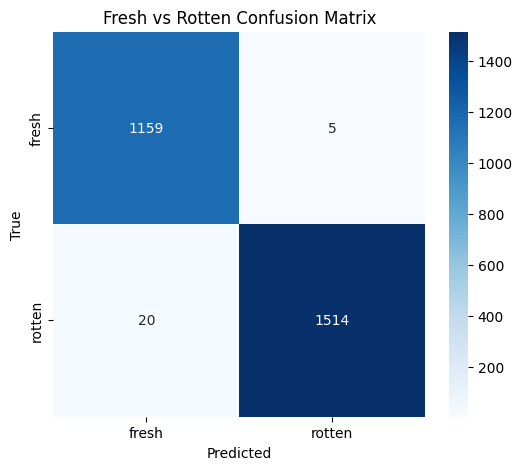

Classification Report (Fresh vs Rotten):

              precision    recall  f1-score   support

       fresh       0.98      1.00      0.99      1164
      rotten       1.00      0.99      0.99      1534

    accuracy                           0.99      2698
   macro avg       0.99      0.99      0.99      2698
weighted avg       0.99      0.99      0.99      2698



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report

# Path to test folder
test_dir = "/content/fruits_dataset/dataset/test"

# Get all classes
classes = sorted(os.listdir(test_dir))
print("Classes found:", classes)

y_true = []
y_pred = []

for class_idx, class_name in enumerate(classes):
    class_folder = os.path.join(test_dir, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        preds = model.predict(img_array)
        predicted_class = np.argmax(preds, axis=1)[0]

        y_true.append(class_idx)
        y_pred.append(predicted_class)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=classes))
